### Purpose: To obtain object statistics from impages imported by user

*Step 1: Import the necessary packages*

In [1]:
import sys
sys.path.append('/Users/HawleyHelm/Desktop/CHE_545_546/Rockstar-Lifestyle')

In [2]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy.ndimage import gaussian_filter
from skimage import filters
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage import morphology
from scipy import ndimage
from skimage import segmentation
from skimage import data, feature
import math

from rockstar_lifestyle import preprocessing
from rockstar_lifestyle import objects

*Step 2: User controlled inputs*

In [3]:
im_contrast_value = 2
block_size = 15

*Step 3: Image Import*

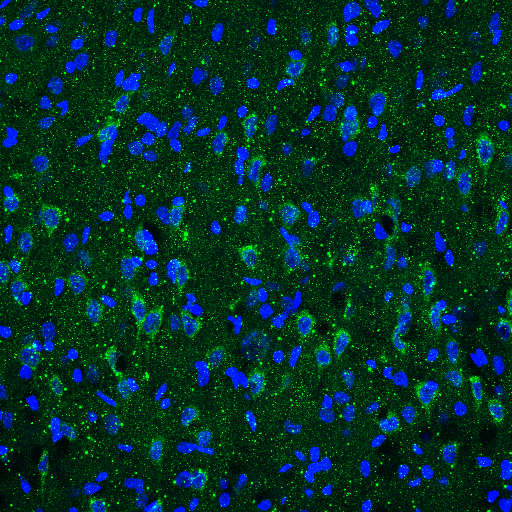

In [4]:
im =  Image.open("Test_Photo_fromMike.png")
im

*Step 4: Splitting image into red, green, blue values*

In [5]:
r,g,b = im.split()

*Step 5: Increasing Contrast*

In [6]:
contrast_image = preprocessing.image_contrast(b, 2)

__Step 6: Otsu Global Threshold*__ 

In [7]:
otsu_global_labels = objects.global_labels(contrast_image)

__Step 6: Local Threshold__

In [8]:
local_adaptive_labels = objects.local_labels(contrast_image, block_size)

*Step 7: Viewing the Labels of the Otsu Global and Local Adaptive Thresholds*

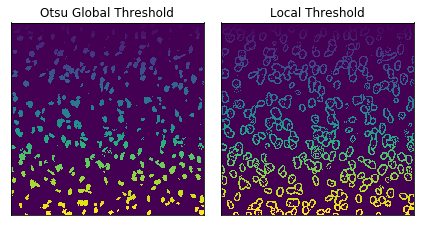

In [9]:
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(otsu_global_labels) 
ax1.set_title('Otsu Global Threshold')
ax1.set_xticks([])
ax1.set_yticks([])

ax2.imshow(local_adaptive_labels)
ax2.set_title('Local Threshold')
ax2.set_xticks([])
ax2.set_yticks([])

fig.tight_layout()

*Step 6: Extract Basic Statistics*

In [10]:
properties_global = measure.regionprops(otsu_global_labels)

properties_local = measure.regionprops(local_adaptive_labels)

*Step 6a: Object Areas in a 10-bin Histogram*

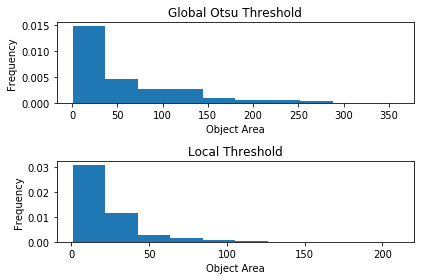

In [11]:
objects.object_area_hist(properties_local, properties_global)

*Step 6b: Finding Image Centroid*

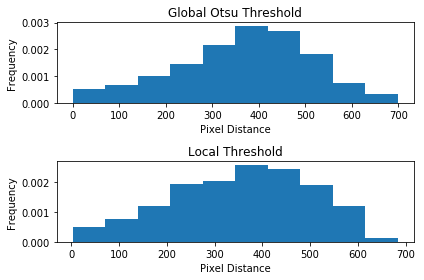

In [12]:
objects.distance_histograms(contrast_image, block_size)

*Step 6: Number of objects*

In [13]:
objects.objectnumber(contrast_image, block_size)

Gobal Threshold Object Number:      660
Local Threshold Object Number:     3630


*Step 6b: Min, Max, Mean, Median, Variance of object areas*

In [14]:
areas_local = [prop.bbox_area for prop in properties_local]
areas_global = [prop.bbox_area for prop in properties_global]

In [15]:
image_centroid_global = properties_global[0].centroid
image_centroid_local = properties_local[0].centroid

In [16]:
object_centroids_global, object_centroids_local = objects.objectcentroids(contrast_image, block_size)

In [20]:
distance_local = objects.distancesarr(image_centroid_local, object_centroids_local)
distance_glocal = objects.distancesarr(image_centroid_global, object_centroids_global)

In [ ]:
min_area_global = min(areas_rw)
max_area_global = max(areas_rw)
mean_area_global = np.mean(areas_rw)
median_area_global = np.median(areas_rw)
variance_area_global = np.var(areas_rw)

In [ ]:
min_area_local = min(areas_rw_adaptive)
max_area_local = max(areas_rw_adaptive)
mean_area_local = np.mean(areas_rw_adaptive)
median_area_local = np.median(areas_rw_adaptive)
variance_area_local = np.var(areas_rw_adaptive)

*Step 6b: Min, Max, Mean, Median, Variance of distances*

In [ ]:
min_distance_global = min(distances_global)
max_distance_global = max(distances_global)
mean_distance_global = np.mean(distances_global)
median_distance_global = np.median(distances_global)
variance_distance_global = np.var(distances_global)

In [ ]:
min_distance_local = min(distances_local)
max_distance_local = max(distances_local)
mean_distance_local = np.mean(distances_local)
median_distance_local = np.median(distances_local)
variance_distance_local = np.var(distances_local)

*Step 7: Obtaining Euler Number*

In [ ]:
Euler_global = [prop.euler_number for prop in properties]
Euler_local = [prop.euler_number for prop in properties_adaptive]